* **1. Import libaries**
* **2. Load the data**
* **3. Data analysis on SQL**
* **4. EDA**
 * 4.1. Clean header names and check datatype 
 * 4.2. Check basic statistics and the unique values
 * 4.3. Drop duplicates and check null values
 * 4.4.  Explore numerical data  
 * 4.5. Explore categorical columns
 * 4.6. Relationshop between accepted offers and the other columns 
 * 4.7. Set index 
 * 4.8. Check the correlation
 * 4.9. Check value counts
* **5. Data processing, feature engineering**
 * 5.1. Apply boxcox transformation
 * 5.2. Remove outliers
* **6. Train/test split, standardize numerical + encode categorical**
* **7. Model evaluation**
 * 7.1. KNeighbors Classifier 
 * 7.2. KNeighbors Classifier with SMOTE
 * 7.3. Logistic Regression
 * 7.4. Logistic Regression - Weights 
* **8. Overview - model results**
* **9. Wrap up and recommended next steps**

### 1. Import libaries

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import warnings
warnings.filterwarnings('ignore')

### 2. Load the data

In [2]:
credit = pd.read_csv('/home/julian/Cursos/Ironhack/Proyectos/mid-bootcamp-project-classification/data/creditcardmarketing.csv')

In [3]:
credit.shape

(18000, 17)

In [4]:
credit.head(3)

,Customer Number,Offer Accepted,Reward,Mailer Type,Income Level,# Bank Accounts Open,Overdraft Protection,Credit Rating,# Credit Cards Held,# Homes Owned,Household Size,Own Your Home,Average Balance,Q1 Balance,Q2 Balance,Q3 Balance,Q4 Balance
0,1,No,Air Miles,Letter,High,1,No,High,2,1,4,No,1160.75,1669.0,877.0,1095.0,1002.0
1,2,No,Air Miles,Letter,Medium,1,No,Medium,2,2,5,Yes,147.25,39.0,106.0,78.0,366.0
2,3,No,Air Miles,Postcard,High,2,No,Medium,2,1,2,Yes,276.50,367.0,352.0,145.0,242.0


### 4. EDA

**4.1. Clean header names and check datatypes**
- Renaming the columns so they follow the PE8 (snake case) and taking out non alphanumeric (#)

In [5]:
credit.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18000 entries, 0 to 17999
Data columns (total 17 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Customer Number       18000 non-null  int64  
 1   Offer Accepted        18000 non-null  object 
 2   Reward                18000 non-null  object 
 3   Mailer Type           18000 non-null  object 
 4   Income Level          18000 non-null  object 
 5   # Bank Accounts Open  18000 non-null  int64  
 6   Overdraft Protection  18000 non-null  object 
 7   Credit Rating         18000 non-null  object 
 8   # Credit Cards Held   18000 non-null  int64  
 9   # Homes Owned         18000 non-null  int64  
 10  Household Size        18000 non-null  int64  
 11  Own Your Home         18000 non-null  object 
 12  Average Balance       17976 non-null  float64
 13  Q1 Balance            17976 non-null  float64
 14  Q2 Balance            17976 non-null  float64
 15  Q3 Balance         

In [6]:
headers = list(credit.columns)
headers_ = [h.replace('# ', '').replace(' ', '_').lower() for h in headers]

In [7]:
credit.columns = headers_

#### 4.2. Check basic statistics and the unique values

In [8]:
credit.describe()

,customer_number,bank_accounts_open,credit_cards_held,homes_owned,household_size,average_balance,q1_balance,q2_balance,q3_balance,q4_balance
count,18000.000000,18000.000000,18000.000000,18000.000000,18000.000000,17976.000000,17976.000000,17976.000000,17976.000000,17976.000000
mean,9000.500000,1.255778,1.903500,1.203444,3.499056,940.515562,910.450656,999.392190,1042.033600,810.185803
std,5196.296758,0.472501,0.797009,0.427341,1.114182,350.297837,620.077060,457.402268,553.452599,559.001365
min,1.000000,1.000000,1.000000,1.000000,1.000000,48.250000,0.000000,0.000000,0.000000,0.000000
25%,4500.750000,1.000000,1.000000,1.000000,3.000000,787.500000,392.750000,663.000000,633.000000,363.000000
50%,9000.500000,1.000000,2.000000,1.000000,3.000000,1007.000000,772.000000,1032.000000,945.500000,703.000000
75%,13500.250000,1.000000,2.000000,1.000000,4.000000,1153.250000,1521.000000,1342.000000,1463.000000,1212.000000
max,18000.000000,3.000000,4.000000,3.000000,9.000000,3366.250000,3450.000000,3421.000000,3823.000000,4215.000000


In [9]:
for c in credit.columns:
    print(credit[c].unique())

[    1     2     3 ... 17998 17999 18000]
['No' 'Yes']
['Air Miles' 'Cash Back' 'Points']
['Letter' 'Postcard']
['High' 'Medium' 'Low']
[1 2 3]
['No' 'Yes']
['High' 'Medium' 'Low']
[2 1 3 4]
[1 2 3]
[4 5 2 6 3 1 8 9]
['No' 'Yes']
[1160.75  147.25  276.5  ...  691.   1649.   1427.25]
[1669.   39.  367. ... 1122. 2139. 1070.]
[ 877.  106.  352. ...   91. 1865. 1824.]
[1095.   78.  145. ... 2265. 2045. 1037.]
[1002.  366.  242. ... 1946. 2035. 2188.]


#### 4.3. Drop duplicates and check null values

In [10]:
credit.isnull().sum()

customer_number          0
offer_accepted           0
reward                   0
mailer_type              0
income_level             0
bank_accounts_open       0
overdraft_protection     0
credit_rating            0
credit_cards_held        0
homes_owned              0
household_size           0
own_your_home            0
average_balance         24
q1_balance              24
q2_balance              24
q3_balance              24
q4_balance              24
dtype: int64

In [11]:
credit.duplicated().sum()

0

In [12]:
n_col = ['average_balance', 'q1_balance', 'q2_balance', 'q3_balance', 'q4_balance']

for c in n_col:
    credit[f'{c}'].fillna(int(credit[f'{c}'].median()), inplace=True)


#### 4.4. Explore numerical data 

#### CREDIT CARDS HELD

<AxesSubplot:xlabel='credit_cards_held'>

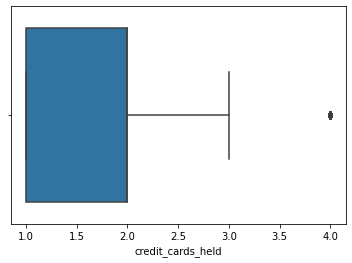

In [13]:
sns.boxplot(credit.credit_cards_held)

In [14]:
card_holders = {'one_card': ((credit.loc[credit.credit_cards_held == 1].shape[0]) * 100) / credit.shape[0],
                'two_card': ((credit.loc[credit.credit_cards_held == 2].shape[0]) * 100) / credit.shape[0],
                'three_card': ((credit.loc[credit.credit_cards_held == 3].shape[0]) * 100) / credit.shape[0],
                'four_card': ((credit.loc[credit.credit_cards_held == 4].shape[0]) * 100) / credit.shape[0]}
percentage = ['Percentages']
cdf = pd.DataFrame(card_holders, index=percentage)
cdf

,one_card,two_card,three_card,four_card
Percentages,34.188889,44.133333,18.816667,2.861111


#### OPEN BANK ACCOUNTS

In [15]:
bank_accs = {'one_bacc': ((credit.loc[credit.bank_accounts_open == 1].shape[0]) * 100) / credit.shape[0],
            'two_bacc': ((credit.loc[credit.bank_accounts_open == 2].shape[0]) * 100) / credit.shape[0],
            'three_bacc': ((credit.loc[credit.bank_accounts_open == 3].shape[0]) * 100) / credit.shape[0]}
percentage = ['Percentages']
bdf = pd.DataFrame(bank_accs, index=percentage)
bdf

,one_bacc,two_bacc,three_bacc
Percentages,76.066667,22.288889,1.644444


#### HOMES OWNED

In [16]:
homes = {'one_home': ((credit.loc[credit.homes_owned == 1].shape[0]) * 100) / credit.shape[0],
         'two_home': ((credit.loc[credit.homes_owned == 2].shape[0]) * 100) / credit.shape[0],
         'three_home': ((credit.loc[credit.homes_owned == 3].shape[0]) * 100) / credit.shape[0]}
percentage = ['Percentages']
hdf = pd.DataFrame(homes, index=percentage)
hdf

,one_home,two_home,three_home
Percentages,80.683333,18.288889,1.027778


#### HOUSE HOLD SIZE

<AxesSubplot:xlabel='household_size'>

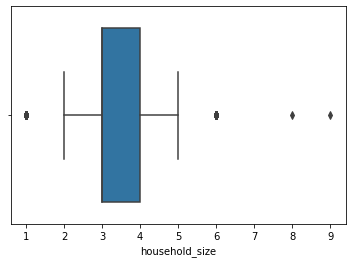

In [17]:
sns.boxplot(credit.household_size)

In [18]:
household = {'one_': ((credit.loc[credit.household_size == 1].shape[0]) * 100) / credit.shape[0],
             'two_': ((credit.loc[credit.household_size == 2].shape[0]) * 100) / credit.shape[0],
            'three_': ((credit.loc[credit.household_size == 3].shape[0]) * 100) / credit.shape[0],
            'four_': ((credit.loc[credit.household_size == 4].shape[0]) * 100) / credit.shape[0],
            'five_': ((credit.loc[credit.household_size == 5].shape[0]) * 100) / credit.shape[0],
            'six_': ((credit.loc[credit.household_size == 6].shape[0]) * 100) / credit.shape[0],
            'eight_': ((credit.loc[credit.household_size == 8].shape[0]) * 100) / credit.shape[0],
            'nine_': ((credit.loc[credit.household_size == 9].shape[0]) * 100) / credit.shape[0]}
percentage = ['Percentages']
hodf = pd.DataFrame(household, index=percentage)
hodf

,one_,two_,three_,four_,five_,six_,eight_,nine_
Percentages,2.994444,15.627778,31.733333,30.794444,15.85,2.988889,0.005556,0.005556


#### AVERAGE ACCOUNT BALANCE

<AxesSubplot:xlabel='average_balance', ylabel='Count'>

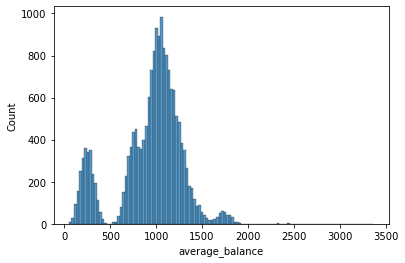

In [19]:
sns.histplot(credit.average_balance)

In [27]:
credit.average_balance.describe()

count    18000.000000
mean       940.604208
std        350.072621
min         48.250000
25%        787.937500
50%       1007.000000
75%       1152.562500
max       3366.250000
Name: average_balance, dtype: float64

**Findings in numerical columns**
- Only 3% of the customer hold more than three credit cards. Therefore, I would recommend to offer a credit card only to customers who only have one or two credit cards yet. 
- 19% of the customers own more than one home (if they are a homeowner at all). 
- Only 24% have more than one open bank account.
- Most of the customers live in a household with other people. Only 3% live alone. 

#### 4.5. Explore categorical columns

In [34]:
offer = {'accepted': ((credit[credit.offer_accepted == 'Yes'].shape[0]) * 100) / credit.shape[0],
         'non accepted': ((credit[credit.offer_accepted == 'No'].shape[0]) * 100) / credit.shape[0]}
percentage = ['Percentages']
odf = pd.DataFrame(offer, index=percentage)
odf

,accepted,non accepted
Percentages,5.683333,94.316667


In [45]:
rewards = {'Air Miles': ((credit[credit.reward == 'Air Miles'].shape[0]) * 100) / credit.shape[0],
           'Cash Back': ((credit[credit.reward == 'Cash Back'].shape[0]) * 100) / credit.shape[0],
           'Points': ((credit[credit.reward == 'Points'].shape[0]) * 100) / credit.shape[0]}
percentage = ['Percentages']
rdf = pd.DataFrame(rewards, index=percentage)
rdf

,Air Miles,Cash Back,Points
Percentages,33.672222,33.327778,33.0


In [46]:
mailer = {'Letter': ((credit[credit.mailer_type == 'Letter'].shape[0]) * 100) / credit.shape[0],
          'Postcard': ((credit[credit.mailer_type == 'Postcard'].shape[0]) * 100) / credit.shape[0]}
percentage = ['Percentages']
mdf = pd.DataFrame(mailer, index=percentage)
mdf

,Letter,Postcard
Percentages,49.183333,50.816667


In [48]:
income = {'High': ((credit[credit.income_level == 'High'].shape[0]) * 100) / credit.shape[0],
          'Medium': ((credit[credit.income_level == 'Medium'].shape[0]) * 100) / credit.shape[0],
          'Low': ((credit[credit.income_level == 'Low'].shape[0]) * 100) / credit.shape[0]}
percentage = ['Percentages']
idf = pd.DataFrame(income, index=percentage)
idf

,High,Medium,Low
Percentages,25.144444,50.072222,24.783333


In [36]:
credit.head(2)

,customer_number,offer_accepted,reward,mailer_type,income_level,bank_accounts_open,overdraft_protection,credit_rating,credit_cards_held,homes_owned,household_size,own_your_home,average_balance,q1_balance,q2_balance,q3_balance,q4_balance
0,1,No,Air Miles,Letter,High,1,No,High,2,1,4,No,1160.75,1669.0,877.0,1095.0,1002.0
1,2,No,Air Miles,Letter,Medium,1,No,Medium,2,2,5,Yes,147.25,39.0,106.0,78.0,366.0


In [47]:
credit.income_level.unique()

array(['High', 'Medium', 'Low'], dtype=object)

**Findings in categorical columns**
- Only 5,68% of the customers accepted an offer. 
- 64,75% of the customer own their home.
- About 85,12% have an overdraft protection on their checking account(s).

#### 4.6. Relationshop between accepted offers and the other columns 

**Findings in the relations between the columns**
- The distribution of customers who accepted the offer appears to be evenly divided between levels of income. Same for the option to have an overdraft protection, owning a home, the amount of open bank accounts, credit cards held and amount of home. 
- My only guess, based on the first overview, is that people who live in a household of the size 3 or 4 are more likely to accept the offer. 

#### 4.7. Set index

Because the customer_number is a unique value, I set it to index.

#### 4.8. Check the correlation

Check the correlation for numerical data

There is a high correlation between the over all average and the average of the quarterly average (q1, q2, q3, q4.) Hence, I decided to drop the average balance.  

Check the correlation for categorical data

**Conclusion**

There is a relationship between the following columns (reject the null hypothesis): 
- offer_accepted  and column credit_rating 
- offer_accepted  and column income_level 
- offer_accepted  and column mailer_type 
- offer_accepted  and column reward

In the other combination is no relationship between the columns (Failed to reject the null hypothesis). 

- To fit the model there is the possibility to drop the columns ('overdraft_protection', 'own_your_home')  without a relationship to the target variable "offer accepted" 
- For the next marketing study I would recommend to change the questions which have no relationship to the target variable "offer accepted". 

#### 4.9. Check value counts

There are only two entries for customers with a household size bigger than 6, so I decided to assign the value 6 to these two entries as well, in order to make the data more balanced. 

### 5.  Data processing, feature engineering

#### 5.1. Apply boxcox transformation

#### 5.2. Remove outliers 

I removed only the outliers of the columns 'q2_balance', 'q3_balance', 'q4_balance' because these are the columns with a higher number of outliers.

### 6. Train/test split, standardize numerical + encode categorical

standardize numerical

encode categorical

concatenate standardize numerical and encode categorical

### 7. Model evaluation

#### 7.1. KNeighbors Classifier

Choose the best k value

**Conclusion KNeighbors Classifier k = 5**\
The precision of No is very high for this model (0.95%), but the precision of Yes is pretty low with 0.08%. The result is based on the high number of No values and low number of Yes values. Next step is to oversample the minority with SMOTE. 

#### 7.2. KNeighbors Classifier with SMOTE

Choose the best k value

**KNeighbors Classifier SMOTE k = 5** 

**Conclusion KNeighbors Classifier SMOTE**
- Even when the accuracy score is less high with the SMOTE technique (Before SMOTE: 0.93; After SMOTE: 0,85; 0,74), this model is able to predict customers who accept the offer. Without SMOTE there was a recall of 0 for Yes. 

#### 7.3. Logistic Regression

**Conclusion Logistic Regression**\
Good prediction when it comes to the True No, but the bad prediction for True Yes makes this approach useless for the given dataset. (Recall No, 0.77, Yes 0.34) 

#### 7.4. Logistic Regression - Weights

Chance the class weight of Yes / No to improve the prediction when it comes to True Yes. 

Train/test split

Standardize numerical and encode categorical

Fit the model with weighted sample size

Even if the accuracy score of 0.66 is not that high, the prediction is better. With the weight balanced data the True Yes works much better, but there are more False No. About 70% of the "No" is predicted True and 75% of the "Yes" is predicted True. 

### 8. Overview - model results

In order to judge which model works best, the following indicators provide the most insight
- accuracy score
- f1 score weighted avg 
- precision No / Yes
- recall No / Yes

Here is an overview of the indicators per model:

These findings lead to the following most notable conclusions per model.

**Conclusion KNeighbors Classifier k = 5**\
The precision of No is very high for this model 0.95, but the precision of Yes is pretty low with 0.08. The result is based on the high number of No values and low number of Yes values.

**Conclusion KNeighbors Classifier - SMOTE**\
Even when the accuracy score is less high with the SMOTE technique (Before SMOTE: 0.93; After SMOTE: 0,85; 0,74), this model is able to predict customers who accept the offer. Without SMOTE there was a recall of 0 for Yes. 

**Conclusion Logistic Regression**\
Good prediction when it comes to the True No, but the bad prediction for True Yes makes this approach useless for the given dataset. (Recall No, 0.77, Yes 0.34) 

**Conclusion Logistic Regression - Weights**\
Even if the accuracy score of 0.66 is not as high, the prediction is better. With the weight balanced data the True Yes works much better. The recall is balanced with the same recall for Yes and No. This model is capable of recognizing any customer who accept the offer.

### 9. Wrap up and recommended next steps

- Logistic Regression with changed class weights fits best for this dataset. Highest Yes recall: 0.69.  
- Next step to evaluate this model: Cut the variables which do not improve the prediction and improve the weight/balance
- For the next marketing study I would recommend to change the questions/parameters which have no relationship to the target variable (Like shown in point 5.2.) and to build bins (For example house hold size 5-9) 